In [17]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from Linear_hashing import Linear_hashing

In [5]:
P = [1,5,10,20,50]
alpha_max_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [8]:

results = {
    "alpha_max":[],
    "tamanho_pag": [],
    "alpha_medio":[],
    "paginas_adicionais": []
}
alpha_medio_vector = []
p_asterisk_vector = []
used_values = []

for p in P:
  values = np.random.choice(np.arange(1, 10000 *p + 1), size=p*1000, replace=False)
  used_values.append(values)
  for y in alpha_max_values:
    d1 = 0
    d2 = 0
    for i in range(0, 10):
      #print(values)
      h = Linear_hashing(page_size=p, m=500, alpha_max=y, alpha_min=0.5)
      for v in values:
        h.insert(v)

      d1 += h.get_alpha_medio()
      d2 += h.get_p_asterisk()
        
    results["alpha_max"].append(y)
    results["tamanho_pag"].append(p)
    results["alpha_medio"].append(round(d1/10, 2))
    results["paginas_adicionais"].append(round(d2/10, 2))

df = pd.DataFrame(results)
df.head()

,alpha_max,tamanho_pag,alpha_medio,paginas_adicionais
0,0.2,1,0.20,0.20
1,0.3,1,0.30,0.31
2,0.4,1,0.40,0.43
3,0.5,1,0.50,0.57
4,0.6,1,0.60,0.73
5,0.7,1,0.70,0.92
6,0.8,1,0.80,1.18
7,0.9,1,0.90,1.70
8,0.2,5,0.20,0.64
9,0.3,5,0.30,0.78


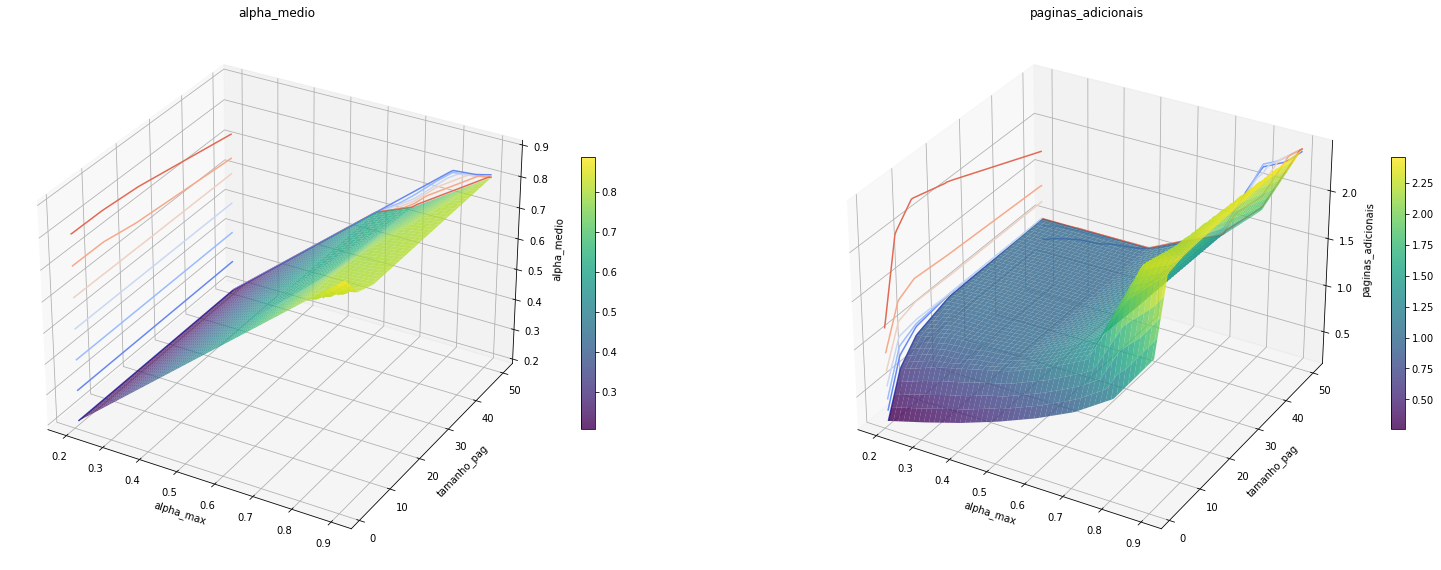

In [75]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')
# Remove old colorbars
x = df["alpha_max"]; y = df["tamanho_pag"]; z = df["alpha_medio"]

# Define grid for interpolation
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


# Interpolate using griddata
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot the interpolated surface
surf1 = ax1.plot_surface(xi, yi, zi, cmap='viridis',alpha=0.8)

# Add colorbar
fig.colorbar(surf1,shrink = 0.5)




# Add contours on the sides
ax1.contour(xi, yi, zi, zdir='x', offset=min(x), cmap='coolwarm')

ax1.contour(xi, yi, zi, zdir='y', offset=max(y), cmap='coolwarm')


z = df["paginas_adicionais"]
zi = griddata((x, y), z, (xi, yi), method='linear')

ax2 = fig.add_subplot(122, projection='3d')

ax2.contour(xi, yi, zi, zdir='x', offset=min(x), cmap='coolwarm')

ax2.contour(xi, yi, zi, zdir='y', offset=max(y), cmap='coolwarm')

surf2 = ax2.plot_surface(xi, yi, zi, cmap='viridis',alpha=0.8)

fig.colorbar(surf2,shrink=0.5)

# Labeling
ax1.set_xlabel('alpha_max')
ax1.set_ylabel('tamanho_pag')
ax1.set_zlabel('alpha_medio')
ax1.set_title("alpha_medio")

ax2.set_xlabel('alpha_max')
ax2.set_ylabel('tamanho_pag')
ax2.set_zlabel('paginas_adicionais')
ax2.set_title("paginas_adicionais")

plt.subplots_adjust(right=1.5)
# Show plot
plt.show()

In [108]:
def create_graphs(data,axes):
    for i,(x_label,df) in enumerate(data.items()):
        axes[i,0].set_title(f'{x_label} x alpha_medio')
        axes[i,0].plot(df[x_label], df["alpha_medio"])
        axes[i,0].set_xlabel(x_label); axes[i,0].set_ylabel("alpha_medio")

        axes[i,1].set_title(f'{x_label} x paginas_adicionais')
        axes[i,1].plot(df[x_label],df["paginas_adicionais"])
        axes[i,1].set_xlabel(x_label); axes[i,1].set_ylabel("paginas_adicionais")

[]

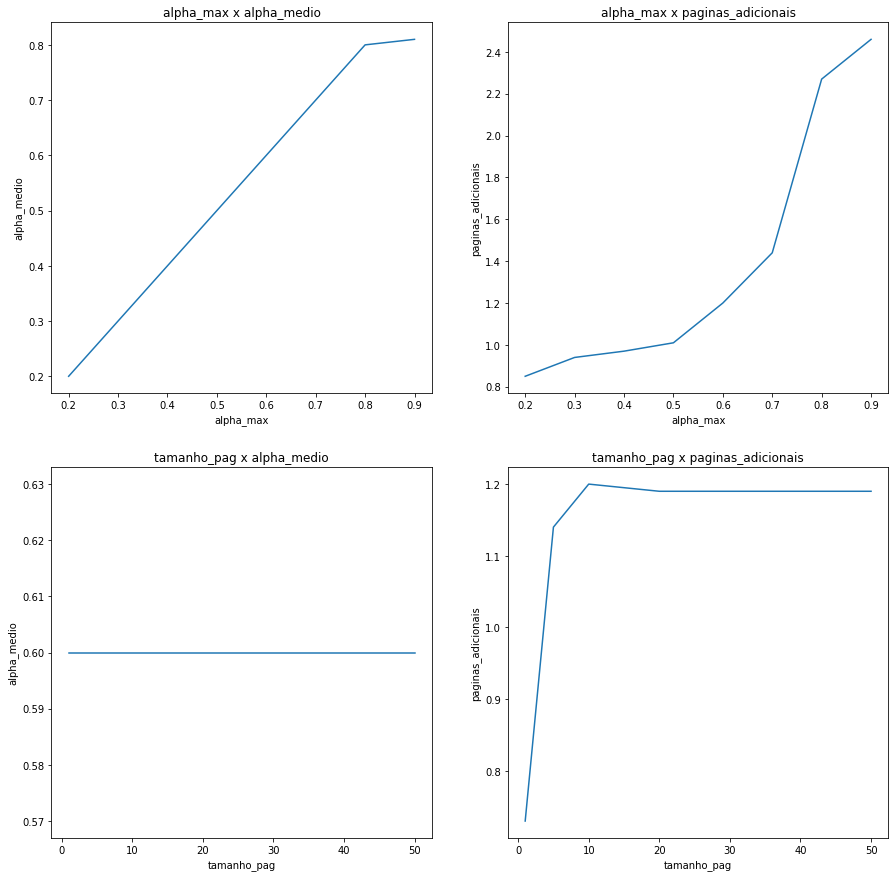

In [111]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,15))

fixed_alpha_df = df[df["alpha_max"] == 0.6]
fixed_page_df = df[df["tamanho_pag"] == df["tamanho_pag"].median()]

data = {
    "alpha_max":fixed_page_df,
    "tamanho_pag":fixed_alpha_df
}
create_graphs(data,axes)
plt.plot()

In [11]:
alpha_max_vector = []
p_values = []


for p in P:
    for y in alpha_max_values:
        alpha_max_vector.append(y)
        p_values.append(p)

print(alpha_max_vector)
print("\n\n\n")
print(p_values)

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]




[1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 50, 50, 50, 50, 50, 50, 50, 50]


In [12]:
alpha_medioAM = []
p_asteriskAM = []

for i in range(0, 8):
    index = i
    acc = 0
    acc2 = 0
    while index < 40:
        acc += alpha_medio_vector[index]
        acc2 += p_asterisk_vector[index]
        index += 8
    alpha_medioAM.append(round(acc/5, 2)) 
    p_asteriskAM.append(round(acc2/5, 2))
    
print(alpha_medioAM)
print(p_asteriskAM)

[0.2, 0.3, 0.4, 0.5, 0.6, 0.69, 0.79, 0.84]
[0.73, 0.81, 0.86, 0.91, 1.08, 1.27, 1.85, 2.29]


In [13]:
p_asteriskP = []
alpha_medioP = []

for i in range(0, 40, 8):
    acc = 0
    acc2 = 0
    for k in range(0, 8):
        acc += p_asterisk_vector[i+k]
        acc2 += alpha_medio_vector[i+k]
    p_asteriskP.append(round(acc/8, 2))
    alpha_medioP.append(round(acc2/8, 2))
    
print(p_asteriskP)
print(alpha_medioP)

[0.75, 1.29, 1.34, 1.4, 1.35]
[0.55, 0.54, 0.54, 0.54, 0.53]


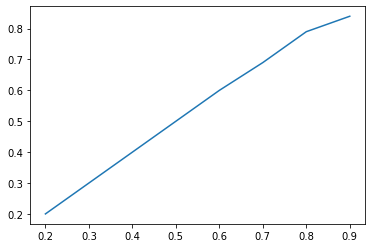

In [14]:
import matplotlib.pyplot as plt

plt.plot(alpha_max_values, alpha_medioAM)

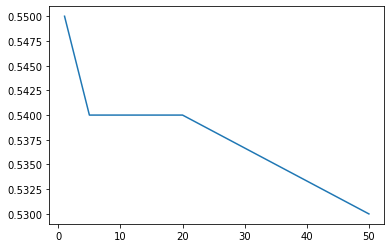

In [15]:
plt.plot(P, alpha_medioP)

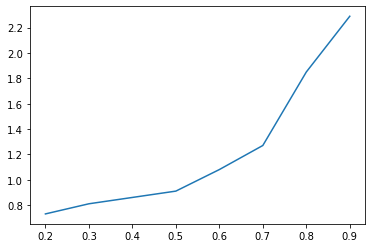

In [16]:
plt.plot(alpha_max_values, p_asteriskAM)

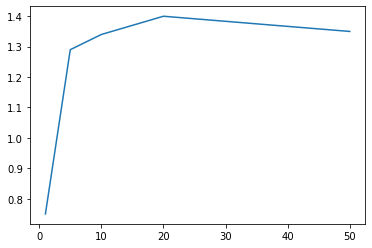

In [17]:
plt.plot(P, p_asteriskP)

In [19]:
from math import ceil
Kc_vector = []


for vec in used_values:
    aux_vector = random.sample(list(vec), ceil(len(vec)*0.2))
    Kc_vector.append(aux_vector)

print(len(Kc_vector))

5


In [21]:
Ks_vector = []

for vec in used_values:
    aux_vector = []
    index = 0
    while len(aux_vector) <= 0.2 * len(vec):
        val = random.randint(1, (P[index] + 1) * 1000000)
        if not (val in vec):
            aux_vector.append(val)
    Ks_vector.append(aux_vector)

print(len(Ks_vector))
print("\n\n\n\n")
for vec in Ks_vector:
    print(vec)
    print("\n\n\n\n")

5





[747985, 886180, 1263261, 35775, 150329, 644463, 1981810, 218058, 1587446, 1326212, 1963938, 1005764, 94202, 1660103, 1501226, 860741, 407965, 497872, 1938126, 1812144, 969109, 1212971, 127259, 1731468, 920404, 1377850, 1398755, 948244, 1623327, 881646, 30591, 835518, 1475212, 1406454, 261177, 1171471, 1385004, 1820550, 268730, 529362, 1931015, 118581, 1758513, 1454235, 452352, 1103253, 471035, 161112, 573142, 1176354, 418888, 302943, 1238260, 1454792, 821136, 1330207, 822660, 210538, 1484656, 683077, 388339, 191547, 1865664, 1663024, 714005, 571205, 1906632, 264687, 1037020, 560690, 759110, 1725311, 461834, 1736297, 1641380, 1231054, 173433, 1345152, 1839466, 1174674, 257213, 106191, 864158, 746134, 46460, 1355859, 950431, 205947, 76193, 382644, 1849244, 1831095, 617279, 225196, 1523760, 1717954, 1396034, 986640, 1529577, 171968, 361885, 1584941, 400420, 446467, 1843171, 456953, 681172, 426932, 1202944, 1172171, 142350, 1470265, 1375122, 747286, 292655, 254967, 49522, 187550, 9

In [23]:
index = 0

for vec in used_values:
    print("--------------")
    print(len(vec))
    print(len(Kc_vector[index]))
    print(len(Ks_vector[index]))
    print("--------------\n")
    index += 1

--------------
1000
200
201
--------------

--------------
5000
1000
1001
--------------

--------------
10000
2000
2001
--------------

--------------
20000
4000
4001
--------------

--------------
50000
10000
10001
--------------

